# Grover's Algorithm (2 qubits)

In [107]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import numpy as np

# Circuit creation (Superposition)

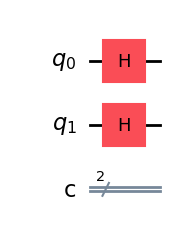

In [108]:
# Create a 2-qubit Grover circuit
grover_circuit = QuantumCircuit(2, 2)

# Apply Hadamard gates to both qubits to create a superposition
grover_circuit.h([0, 1])

# Draw the circuit
grover_circuit.draw('mpl')

# The Quantum Oracle

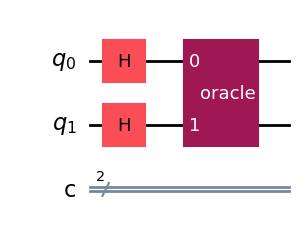

In [109]:
# Create a quantum circuit on 2 qubits
oracle = QuantumCircuit(2, name='oracle')

# Create a 2-qubit oracle
oracle.cz(0, 1)

oracle.to_gate()

# Append the oracle gate to the grover circuit
grover_circuit.append(oracle, [0, 1])

grover_circuit.draw('mpl')

# Local simulation

In [110]:
# Simulate the circuit using the statevector simulator
backend = Aer.get_backend('statevector_simulator')
job = backend.run(transpile(grover_circuit, backend))
result = job.result()

# Get the statevector of the circuit
sv = result.get_statevector()
np.round(sv, 2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

# Amplification
- Perform reflection

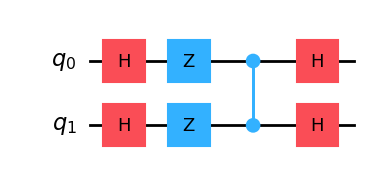

In [111]:
# Perform a reflection operation about the |00> state
reflection = QuantumCircuit(2, name='reflection')

# Apply Hadamard gates to both qubits
reflection.h([0, 1])

# Apply Pauli X gates to both qubits
reflection.z([0, 1])

# Apply a Controlled-Z gate
reflection.cz(0, 1)

# Apply Hadamard gates to both qubits to transform back to the computational basis
reflection.h([0, 1])

# Convert the reflection circuit to a gate
reflection.to_gate()

reflection.draw('mpl')

# Complete Circuit

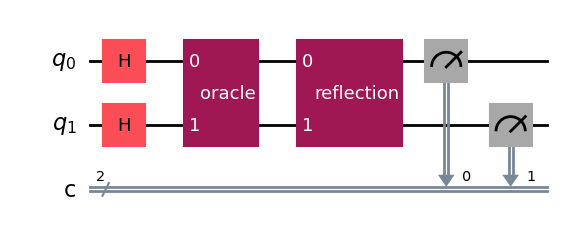

In [112]:
gc = QuantumCircuit(2, 2)

# Apply Hadamard gates to both qubits
gc.h([0, 1])

# Append the oracle
gc.append(oracle, [0, 1])

# Append the reflection
gc.append(reflection, [0, 1])

# Measure the qubits
gc.measure([0, 1], [0, 1])

gc.draw('mpl')

# Simulation with QASM

In [113]:
# Simulate the circuit using the qasm simulator
backend = Aer.get_backend('qasm_simulator')

# Run the job with only a single shot
circuit = transpile(gc, backend)
job = backend.run(circuit, shots=1)

result = job.result()

In [114]:
# Get the counts of the circuit
counts = result.get_counts()
counts

{'11': 1}